In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from model import _build_model, _build_simple_model, _build_simple_model2
from model_reduced import _build_model, _build_simple_model, _build_simple_model2, _build_reduced_model, _build_reduced_model2
from core_guide2 import Graph

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="2"

gpus = tf.config.experimental.list_logical_devices('GPU')
print(gpus)

[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [2]:
model =keras.models.load_model('reduced_modelx_guide2_universal') 
# model =keras.models.load_model('reduced_modelxa_thru') 
# model = keras.models.load_model('reduced_modelxI_universal')
# only for planning use, ignore the trianing warnning below

In [3]:
# initialize env
import itertools
from corex import Graph
action_dict = list(itertools.product(np.round(np.arange(-0.1,0.15,0.05), decimals=2), \
                                     np.round(np.arange(-3,4,1), decimals=0)))

In [4]:
# env=Graph()
# timesteps = 10
# state = env.reset()
# for timestep in range(timesteps):
#     subject_tensor = tf.convert_to_tensor(state[0])
#     subject_tensor = tf.expand_dims(subject_tensor, 0)

#     veh_tensor = tf.convert_to_tensor(state[1])  
#     veh_tensor = tf.expand_dims(veh_tensor, 0)

#     ped_tensor = tf.convert_to_tensor(state[2])  
#     ped_tensor = tf.expand_dims(ped_tensor, 0)

#     cyc_tensor = tf.convert_to_tensor(state[3])  
#     cyc_tensor = tf.expand_dims(cyc_tensor, 0)

#     edge_tensor = tf.convert_to_tensor(state[4])   
#     edge_tensor = tf.expand_dims(edge_tensor, 0) 

#     # state_tensor = tf.expand_dims(state_tensor, 0)
#     state_tensor = [subject_tensor, veh_tensor, ped_tensor, cyc_tensor, edge_tensor]
#     action_probs = model(state_tensor, training=False)
#     # Take best action
#     action = tf.argmax(action_probs[0]).numpy()
#     state_next, reward, done, _ = env.step(action)
#     print(action, action_dict[action], reward,done, _)
#     state = state_next
# print(env.target.history)

In [31]:
env2=Graph()
timesteps = 10
state = env2.reset()
for timestep in range(timesteps):
    subject_tensor = tf.convert_to_tensor(state[0])
    subject_tensor = tf.expand_dims(subject_tensor, 0)

    veh_tensor = tf.convert_to_tensor(state[1])  
    veh_tensor = tf.expand_dims(veh_tensor, 0)

    ped_tensor = tf.convert_to_tensor(state[2])  
    ped_tensor = tf.expand_dims(ped_tensor, 0)

    cyc_tensor = tf.convert_to_tensor(state[3])  
    cyc_tensor = tf.expand_dims(cyc_tensor, 0)

    edge_tensor = tf.convert_to_tensor(state[4])   
    edge_tensor = tf.expand_dims(edge_tensor, 0) 

    # state_tensor = tf.expand_dims(state_tensor, 0)
    state_tensor = [subject_tensor, veh_tensor, ped_tensor, cyc_tensor, edge_tensor]
    action_probs = model(state_tensor, training=False)
    # Take best action
#     print(action_probs)
    print('--------------')
    action = tf.argmax(action_probs[0]).numpy()
    state_next, reward, done, _ = env2.step(action)
   
    print(timestep, action, action_dict[action], reward,done, _)
    if done:
        break
    state = state_next
#     print(state)
    print("====================")
#     if timestep>2:break
print(env2.target.history)

/home/lab1/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator BayesianGaussianMixture from version 0.24.1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


--------------
0 24 (0.05, 0) 1.6789074286784649 False feasible
--------------
1 24 (0.05, 0) 1.292588027329681 False feasible
--------------
2 24 (0.05, 0) 1.0037818361982782 False feasible
--------------
3 24 (0.05, 0) 1.0734174107094194 False feasible
--------------
4 24 (0.05, 0) 0.8936879422676562 False feasible
--------------
5 24 (0.05, 0) 0.7659126960723028 False feasible
--------------
6 24 (0.05, 0) 0.7391546989850369 False feasible
--------------
7 24 (0.05, 0) 0.7575651157243137 False feasible
--------------
8 24 (0.05, 0) 0.7823383608021288 False feasible
--------------
9 24 (0.05, 0) 0.8054694466138326 True reach_goal
[[0, 550.118, -2377.157, -0.3002138200511908, 38.550079425068134], [1, 555.7988878984282, -2372.630105009762, -0.2502138200511908, 38.550079425068134], [2, 561.071021177143, -2367.828878756518, -0.8157918916365545, 42.32349903534751], [3, 566.1145173030155, -2362.8378880902155, 0.5344409402908525, 44.70020252731134], [4, 571.0675554565508, -2357.511892083685

In [33]:
sample = env2.sample
# print(sample)
target_obs = env2.target.traj[:10]
target_planned = np.array(env2.target.history)[:,1:3]

In [34]:
print(target_obs.shape, target_planned.shape)

(10, 2) (11, 2)


### visualize on map 

In [27]:
import sys 
# locate to the working folder
# sys.path.append("D:\\GitHub\\Clone\\planning\\ruixuan")
from ruixuan.turning_scene import *
from l5kit.rasterization.rasterizer_builder import _load_metadata
import time
import pickle
import math
from collections import deque

In [12]:
class Trajectory(Scene):
    
    def __init__(self, dataset, Map_Api):
        super(Trajectory, self).__init__(dataset, Map_Api)
        self.label_name = ['Car','Van','Tram','Bus','Truck','EV','OV','Bicycle',\
                           'Motorcycle','Cyclist','Motorcyclist','Pedestrian']
        self.label_idx = list(range(3,15))
        self.label_dict = dict(zip(self.label_name, self.label_idx))
        self.all_traffic_control = None
        self.Traffic_Control = None

    def generate_info_from_MAP(self):
        self.all_junctions = self.get_elements("junction")
        self.all_lanes = self.get_elements("lane")
        self.all_traffic_control = self.get_elements("traffic_control_element")
        self.Lane = {self.map_api.id_as_str(lane.id):lane.element.lane for lane in self.all_lanes}
        self.Junction = {self.map_api.id_as_str(junction.id):junction for junction in self.all_junctions}
        self.Traffic_Control = {self.map_api.id_as_str(traffic_control.id):traffic_control.element for traffic_control in self.all_traffic_control}
        
        for junction in self.all_junctions:
            self.Junction_Lane[self.map_api.id_as_str(junction.id)] = []

            for lane in junction.element.junction.lanes:
                self.Junction_Lane[self.map_api.id_as_str(junction.id)].append(self.map_api.id_as_str(lane))

            self.Junction_Lane[self.map_api.id_as_str(junction.id)] = set(self.Junction_Lane[self.map_api.id_as_str(junction.id)])
        
        self.junction_scene = dict.fromkeys(list(self.Junction.keys()), [])
        self.junction_turning_scene = dict.fromkeys(list(self.Junction.keys()), {})
        for key in self.Junction.keys():
            self.junction_turning_scene[key] = {'Turning Left': [], 'Turning Right': []}    
        
        
    def label_loc_check(self, target_label):
    
        agent_id_list = self.agent_list[self.label_dict[target_label]-3]

        for agent_id in agent_id_list:
            agent_loc = self.agent_centroid[np.where(self.agent_id==agent_id)[0]]
            for centroid in agent_loc:
                if self.Junction_region.contains(Point(centroid[0],centroid[1])):
                    return True
    
    def junction_lane_visualize(self, junction_id):
        
        plt.figure(figsize=(18,18))
        
        lane_list = self.Junction_Lane[junction_id]
        
        for lane in lane_list:
            plt.plot(self.map_api.get_lane_coords(lane)['xyz_left'][:,0].tolist()+ self.map_api.get_lane_coords(lane)['xyz_right'][:,0].tolist(),
                        self.map_api.get_lane_coords(lane)['xyz_left'][:,1].tolist()+ self.map_api.get_lane_coords(lane)['xyz_right'][:,1].tolist(),
                        marker='x', label = lane)

        plt.axis("equal")
        plt.grid(which='both')
        plt.legend(fontsize=20)
        axes = plt.gca()  
    
                
    def agent_trajectory(self, scene, target_label, junction_boundary):

        self.scene = scene
        self.target_label = target_label
#         self.junction = junction
        # region for junction "sGK1"
#         junction_boundary = {junction:[(300,-1150),[300,-1100],(340,-1100),(340,-1150)]}

        # region for junction "8KfB"
#         junction_boundary = {junction:[(500,-2420),(500,-2360),(560,-2360),(560,-2420)]}
        
        # region for lane merge
#         junction_boundary = {junction:[(-940,1380),(-940,1480),(-880,1380),(-880,1480)]}

        self.Junction_region = Polygon(junction_boundary)

        self.agent_list = []
        frame_interval = self.dataset.scenes[scene]['frame_index_interval']
        agent_interval_begin = self.dataset.frames[frame_interval[0]]['agent_index_interval'][0]
        agent_interval_end = self.dataset.frames[frame_interval[1]-1]['agent_index_interval'][1]
        self.agent_id = self.dataset.agents[agent_interval_begin:agent_interval_end]['track_id']
        agent_label_prob = self.dataset.agents[agent_interval_begin:agent_interval_end]['label_probabilities']
        self.agent_centroid = self.dataset.agents[agent_interval_begin:agent_interval_end]['centroid']

        for label in self.label_idx:
            valid_idx = np.where(agent_label_prob[:,label]>0.5)[0]
            valid_id = set(self.agent_id[valid_idx])
            self.agent_list.append(list(valid_id))

        if len(self.agent_list[self.label_dict[target_label]-3])>0 and self.label_loc_check(target_label):
            return [scene]
        else:
            # print('Not feasible scene')
            return []
        
    def get_agent_traj(self, scene, target_label, junction, lane_list):
        veh_traj, ped_traj, cyclist_traj=[], [], [] 
        print(self.label_dict, self.label_dict[target_label])
        for idx, agent_label in enumerate(self.agent_list):
            print("xxx", idx, agent_label)
            for agent in agent_label:
                agent_loc = self.agent_centroid[np.where(self.agent_id==agent)[0]]
                if idx != self.label_dict[target_label]-3 and agent_loc.shape[0] > 200  \
                and np.linalg.norm(agent_loc[0,:]-agent_loc[-1,:]) > 5:
                    veh_traj.append(agent_loc)
#                     plt.plot(agent_loc[:,0],agent_loc[:,1],label='Agent ID '+str(agent)+': '\
#                              +self.label_name[idx], color=colors[idx])

                elif idx== self.label_dict[target_label]-3 and agent_loc.shape[0] > 100:
                    ped_traj.append(agent_loc)
        veh_traj, ped_traj, cyclist_traj = np.array(veh_traj), np.array(ped_traj), np.array(cyclist_traj)
        return veh_traj, ped_traj,cyclist_traj
#                     plt.plot(agent_loc[:,0],agent_loc[:,1], color=colors[idx], marker='*')
            
            
            
    def trajectory_junction_visualize(self, scene, target_label, junction, lane_list):
        
        frame_interval = self.dataset.scenes[scene]['frame_index_interval']
        
        plt.figure(figsize=(18,18))

        for lane in lane_list:
            plt.plot(self.map_api.get_lane_coords(lane)['xyz_right'][:,0], self.map_api.get_lane_coords(lane)['xyz_right'][:,1],
                     color='k',linewidth=5, alpha=0.2)
            plt.plot(self.map_api.get_lane_coords(lane)['xyz_left'][:,0], self.map_api.get_lane_coords(lane)['xyz_left'][:,1],
                     color='k',linewidth=5, alpha=0.2)

        cmap = plt.get_cmap('gnuplot')    
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
         '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','maple','yellowgreen'] 

        for idx, agent_label in enumerate(self.agent_list):
            for agent in agent_label:
                agent_loc = self.agent_centroid[np.where(self.agent_id==agent)[0]]
                if idx != self.label_dict[target_label]-3 and agent_loc.shape[0] > 100  and np.linalg.norm(agent_loc[0,:]-agent_loc[-1,:]) > 5:
                    plt.plot(agent_loc[:,0],agent_loc[:,1],label='Agent ID '+str(agent)+': '+self.label_name[idx], color=colors[idx])

                elif idx== self.label_dict[target_label]-3 and  agent_loc.shape[0] > 100:
                    plt.plot(agent_loc[:,0],agent_loc[:,1], color=colors[idx], marker='*')

        ego_translation = self.frames[frame_interval[0]:frame_interval[1]]['ego_translation']
        plt.plot(ego_translation[:,0],ego_translation[:,1],label='Ego',color='r')
        turn = ' Left Turn' if rotation33_as_yaw(self.frames[frame_interval[0]]['ego_rotation']) - rotation33_as_yaw(self.frames[frame_interval[1]-1]['ego_rotation']) < 0 else ' Right Turn'

        plt.axis("equal")
        plt.grid(which='both')
        plt.legend(fontsize=20,loc='best')
        plt.title('Trajectory : Scene '+str(scene)+turn+' at Junction '+junction, fontsize=30)
        axes = plt.gca()


In [13]:
# set env variable for data
os.environ["L5KIT_DATA_FOLDER"] = "/home/lab1/repo/planning/prediction-dataset"
# get config
cfg = load_config_data("/home/lab1/repo/planning/ruixuan/visualisation_config.yaml")
print(cfg)

dm = LocalDataManager()
dataset_path = dm.require(cfg["val_data_loader"]["key"])
zarr_dataset = ChunkedDataset(dataset_path)
zarr_dataset.open()
print(zarr_dataset)

rast = build_rasterizer(cfg, dm)
ego_dataset = EgoDataset(cfg, zarr_dataset, rast)

semantic_map_filepath = dm.require(cfg["raster_params"]["semantic_map_key"])
dataset_meta = _load_metadata(cfg["raster_params"]["dataset_meta_key"], dm)
world_to_ecef = np.array(dataset_meta["world_to_ecef"], dtype=np.float64)
Map_Api = MapAPI(semantic_map_filepath, world_to_ecef)

{'format_version': 4, 'model_params': {'model_architecture': 'resnet50', 'history_num_frames': 0, 'future_num_frames': 50, 'step_time': 0.1}, 'raster_params': {'raster_size': [320, 320], 'pixel_size': [0.5, 0.5], 'ego_center': [0.6, 0.5], 'map_type': 'py_semantic', 'satellite_map_key': 'aerial_map/aerial_map.png', 'semantic_map_key': 'semantic_map/semantic_map.pb', 'dataset_meta_key': 'meta.json', 'filter_agents_threshold': 0.5, 'disable_traffic_light_faces': False, 'set_origin_to_bottom': True}, 'val_data_loader': {'key': 'scenes/train.zarr', 'batch_size': 12, 'shuffle': False, 'num_workers': 16}}
+------------+------------+------------+---------------+-----------------+----------------------+----------------------+----------------------+---------------------+
| Num Scenes | Num Frames | Num Agents | Num TR lights | Total Time (hr) | Avg Frames per Scene | Avg Agents per Frame | Avg Scene Time (sec) | Avg Frame frequency |
+------------+------------+------------+---------------+------

In [14]:
junction_lane_merge = np.load('ruixuan/target_scene_index/lane_merge/scene_index(lane_merge)_Pedestrian.npy',allow_pickle = True)
junction_8KfB = np.load('ruixuan/target_scene_index/8KfB/scene_index(8KfB)_Pedestrian.npy',allow_pickle = True)

In [15]:
Test = Trajectory(zarr_dataset, Map_Api)
Test.generate_info_from_MAP()

In [16]:
lane_list = {}
junction_boundary = {}
# extend lane sequences
lane_list['lane_merge'] = ['ADrl',"oFEC",'m0JU','iQgg','M5V5','/Pgg','FFEC','XHTU']
lane_list['8KfB'] = ['/24B','6p63','FV1O','MV/U','SxVb','TG2b','TZZv','ZnUV','bH1o','dddQ','nXc0','zHjP','SD8o','vC8o']
junction_boundary['lane_merge'] = [(-940,1380),(-940,1480),(-880,1380),(-880,1480)]
junction_boundary['8KfB'] = [(500,-2420),(500,-2360),(560,-2360),(560,-2420)]
# junction_boundary['8KfB'] = [(450,-2400),(500,-2360),(560,-2360),(560,-2420)]

grid_boundary={}
grid_boundary['8KfB']={'X':[450,600], 'Y':[-2450, -2300]}

In [17]:
def get_grid(intersection_id,grid_boundary):
    x = grid_boundary[intersection_id]['X']
    y = grid_boundary[intersection_id]['Y']
    x_ = np.linspace(x[0], x[1],150)
    y_ = np.linspace(y[0], y[1],150)
    x_mesh, y_mesh = np.meshgrid(x_, y_)
    return x_mesh, y_mesh

def locate_in_mesh(x_mesh, y_mesh, point):
    x, y = point[0], point[1]
    result=[]
#     print(x, y, x_mesh[0], x_mesh[-1], y_mesh[0], y_mesh[-1])
    if x>x_mesh[-1] or x<x_mesh[0] or y>y_mesh[-1] or y<y_mesh[0]:
        return None
    result = [math.floor(x-x_mesh[0]), math.floor(y-y_mesh[0])]
    return result

def plot_planned_on_grid(intersection_id, lane_list, grid_boundary, veh=None, ped=None, cyc=None,\
                        target_obs=None, planned=None, other_planned=None):
    """
    plt agent trajectories in the grid map for a scene
    """
    plt.figure(figsize=(18,18))
    plt.xlim(grid_boundary['8KfB']['X'][0],grid_boundary['8KfB']['X'][1])
    plt.ylim(grid_boundary['8KfB']['Y'][0],grid_boundary['8KfB']['Y'][1])
    for lane in lane_list[intersection_id]:
        plt.plot(Test.map_api.get_lane_coords(lane)['xyz_right'][:,0], Test.map_api.get_lane_coords(lane)['xyz_right'][:,1],
                 color='g',linewidth=1,label=lane)
        plt.plot(Test.map_api.get_lane_coords(lane)['xyz_left'][:,0], Test.map_api.get_lane_coords(lane)['xyz_left'][:,1],
                 color='g',linewidth=1)
#         print("lane coordinates right", Test.map_api.get_lane_coords(lane)['xyz_right'][:,0])
    x_mesh, y_mesh = get_grid(intersection_id, grid_boundary)
#     print(x_mesh.shape, y_mesh[:,1])
    plt.plot(x_mesh, y_mesh, c='grey', linewidth=0.1) # use plot, not scatter
    plt.plot(np.transpose(x_mesh), np.transpose(y_mesh),c='grey', linewidth=0.1) # add this here
#     plt.title(intersection_id,fontsize=30)

    if veh is not None:
        for traj in veh: plt.plot(traj[:,0],traj[:,1], c='b',linewidth=0.5)
    if ped is not None:
        for traj in ped: plt.scatter(traj[:,0],traj[:,1], c='orange',linewidth=0.5)
    if cyc is not None:
        for traj in cyc: plt.plot(traj[:,0],traj[:,1], c='cyan',linewidth=0.5)
    if target_obs is not None:
        plt.plot(target_obs[:,0],target_obs[:,1], c='green',linewidth=1)
    if planned is not None:
        plt.plot(planned[:,0],planned[:,1], c='red',linewidth=1)
    if other_planned is not None:
        plt.plot(planned[:,0],planned[:,1], c='pink',linewidth=1)
    plt.axis('off')
    plt.show()
    

In [18]:
def animate_planned_on_grid(intersection_id, lane_list, grid_boundary, veh=None, ped=None,\
                            cyc=None, target_obs=None, planned=None):
    """
    plt agent trajectories in the grid map for a scene
    """
    for idx in range(20):
        plt.figure(figsize=(18,18),frameon=False)
        plt.xlim(grid_boundary['8KfB']['X'][0],grid_boundary['8KfB']['X'][1])
        plt.ylim(grid_boundary['8KfB']['Y'][0],grid_boundary['8KfB']['Y'][1])
        for lane in lane_list[intersection_id]:
            plt.plot(Test.map_api.get_lane_coords(lane)['xyz_right'][:,0], Test.map_api.get_lane_coords(lane)['xyz_right'][:,1],
                     color='g',linewidth=1,label=lane)
            plt.plot(Test.map_api.get_lane_coords(lane)['xyz_left'][:,0], Test.map_api.get_lane_coords(lane)['xyz_left'][:,1],
                     color='g',linewidth=1)
    #         print("lane coordinates right", Test.map_api.get_lane_coords(lane)['xyz_right'][:,0])
        x_mesh, y_mesh = get_grid(intersection_id, grid_boundary)
    #     print(x_mesh.shape, y_mesh[:,1])
        plt.plot(x_mesh, y_mesh, c='grey', linewidth=0.1) # use plot, not scatter
        plt.plot(np.transpose(x_mesh), np.transpose(y_mesh),c='grey', linewidth=0.1) # add this here
    #     plt.title(intersection_id,fontsize=30)

    
        if veh is not None:
            for traj in veh: 
                plt.plot(traj[:idx,0],traj[:idx,1], c='b',linewidth=1)
        if ped is not None:
            for traj in ped: 
                plt.plot(traj[:idx,0],traj[:idx,1], c='orange',linewidth=1)
        if cyc is not None:
            for traj in cyc: 
                plt.plot(traj[:idx,0],traj[:idx,1], c='cyan',linewidth=1)
                
        if target_obs is not None and planned is not None:
            if idx<10:
                plt.plot(target_obs[:idx,0],target_obs[:idx,1], c='green',linewidth=1)
            else:
                plt.plot(target_obs[:10,0],target_obs[:10,1], c='green',linewidth=1)
                plt.plot(planned[:idx-9,0],planned[:idx-9,1], c='red',linewidth=2)

        plt.axis('off')
        plt.ioff()
        plt.savefig("animation_fig/%s.png" %(str(idx)),  bbox_inches='tight',pad_inches = 0)
#         plt.show()

In [19]:

    
def get_aseq(traj):
    aseq=[]
    vseq=[]
    for i in range(9,len(traj)-1):
        curr = traj[i+1]
        prev = traj[i]
        prev2= traj[i-1]
        v10 = np.linalg.norm(curr - prev)/0.5
        v9 = np.linalg.norm(prev - prev2)/0.5
        a = (v10-v9)/0.5
        aseq.append(a)
        vseq.append((v10+v9)/2)
    return aseq, vseq
    
def get_jerkness(traj):
    """
    compute the jerkness of the trajectory of 20 points
    """
   
    history_a,history_a = get_aseq(traj)
    jerk=[]
    for i in range(1,len(history_a)):
        jerk.append(abs((history_a[i]-history_a[i-1])/0.5))
    return jerk

def get_energy_consumption(vseq, aseq):
    # ref: https://www.sciencedirect.com/science/article/pii/S1361920915301280?casa_token=8cxvEOX36HEAAAAA:pb0MizZnGEW4ZMZKnRPgURXOsd6COFG_IuWO-8oVWkXSLcY3D0t9oFXuRogrHWTsnW_jFKgYtw
    E=[]
    accumulated_e=[0]
    for t in range(len(vseq)):
        v, a=vseq[t], aseq[t]
        if a<=0:
            accumulated_e.append(accumulated_e[-1])
            continue # break, no energy consumed
        #ford
        p = 1110*v-96.61*(v**2)+2.745*(v**3) + 1439*v*a
        E.append(p*0.5)
        accumulated_e.append(accumulated_e[-1] + p*0.5)
#         E.append(accumulated_e)
    return accumulated_e

In [76]:
# jerk_human [0.47135448517583, 0.6736429853806456, 0.09502063685297202, 0.017462962210657906, 0.15220067716703412, 0.26064686881343135, 0.09606740853697104, 0.5343375198257476, 0.3574627125169201]
# jerk_planned [0.25596861381728075, 0.572498735278014, 0.3843318111166063, 0.03877883732147325, 0.06736885747823251, 0.20642377299035175, 0.17835713867490455, 0.21913505564473468, 0.4459001161712379]

# acc_human [0.040582742458184384, 0.9021262278934756, 0.4451597428678191, -0.2551184691618751, 0.22019254474055927, 0.08420880959350541, 0.4370849280333573, -0.2449501109594152, -0.82372492869208, 0.10879950365823987]
# v_human [12.796769477687214, 13.032446720275129, 13.369268212965451, 13.416778531391937, 13.408047050286608, 13.484147388870126, 13.614470823276841, 13.662504527545327, 13.395335767632453, 13.216604411373993]
# acc_planned [0.04058274245818794, 0.47135448517637, 0.6736429853796579, 0.09502063685355111, -0.017462962210604616, 0.1522006771670732, 0.2606468688136303, 0.09606740853617524, -0.5343375198256375, -0.3574627125168419]
# v_planned [12.796769477687214, 12.924753784595854, 13.211003152234861, 13.403169057793164, 13.4225584764539, 13.456242905193017, 13.559454791688193, 13.648633361025645, 13.539065833203278, 13.316115775117659]

# e_human [0, 2441.7290651884186, 12967.50570826666, 19315.326809772734, 19315.326809772734, 23505.274562635474, 26388.016866311056, 32735.542036923416, 32735.542036923416, 32735.542036923416, 35836.15200561667]
# e_planned [0, 2441.7290651884514, 8892.27244593839, 17361.475008663645, 20343.5453969241, 20343.5453969241, 23882.85751331038, 28491.610175005306, 31501.12963843508, 31501.12963843508, 31501.12963843508]
# energy consumption by human/planned [0, 2441.7290651884186, 12967.50570826666, 19315.326809772734, 19315.326809772734, 23505.274562635474, 26388.016866311056, 32735.542036923416, 32735.542036923416, 32735.542036923416, 35836.15200561667] [0, 2441.7290651884514, 8892.27244593839, 17361.475008663645, 20343.5453969241, 20343.5453969241, 23882.85751331038, 28491.610175005306, 31501.12963843508, 31501.12963843508, 31501.12963843508]
# Total energy consumed for human/model 237975.95793833394 216260.42391725964

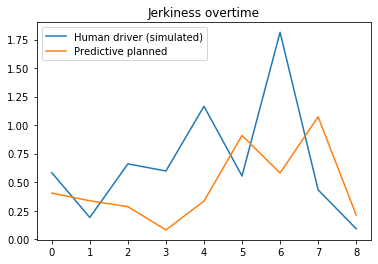

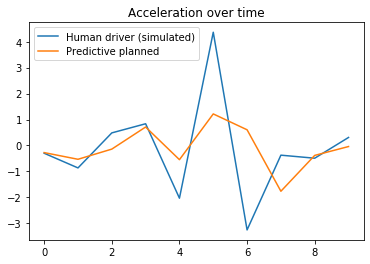

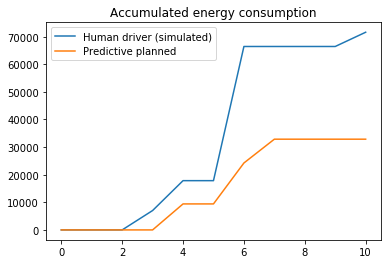

Total energy consumed for human/model 380103.09435694746 174541.38137018704


In [35]:
jerk_human = get_jerkness(env2.target.traj)
# print("jerk_human",jerk_human)
jerk_planned = get_jerkness(np.vstack((target_obs, target_planned[1:])))
# print("jerk_planned",jerk_planned)
x = np.arange(len(jerk_human))
plt.title('Jerkiness overtime')
plt.plot(np.arange(len(jerk_human)), jerk_human, label='Human driver (simulated)')
plt.plot(np.arange(len(jerk_planned)), jerk_planned, label= "Predictive planned")
plt.legend()
# plt.savefig('result_fig/jerk')
plt.show()


acc_human, v_human = get_aseq(env2.target.traj)
acc_planned, v_planned = get_aseq(np.vstack((target_obs, target_planned[1:])))
# print("acc_human", acc_human)
# print("v_human", v_human)
# print("acc_planned", acc_planned)
# print("v_planned", v_planned)
x = np.arange(len(acc_human))
plt.title("Acceleration over time")
plt.plot(np.arange(len(acc_human)), acc_human, label='Human driver (simulated)')
plt.plot(np.arange(len(acc_planned)), acc_planned, label= "Predictive planned")
plt.legend()
# plt.savefig('result_fig/acc')
plt.show()

e_human  = get_energy_consumption(v_human, acc_human)
e_planned = get_energy_consumption(v_planned, acc_planned)
# print("e_human", e_human)
# print("e_planned", e_planned)
# print("energy consumption by human/planned",e_human, e_planned)
plt.plot(np.arange(len(e_planned)),e_human ,label='Human driver (simulated)')
plt.plot(np.arange(len(e_planned)),e_planned, label= "Predictive planned" )
plt.legend()
plt.title("Accumulated energy consumption")
plt.show()
print('Total energy consumed for human/model', sum(e_human), sum(e_planned))

In [55]:
# n_cases= 100
# all_ah, all_ap, all_jerkh, all_jerkp = [], [],[],[]
# finished = 0
# while finished<n_cases:
#     print(finished)
#     timesteps = 10
#     state = env2.reset()
#     for timestep in range(timesteps):
#         subject_tensor = tf.convert_to_tensor(state[0])
#         subject_tensor = tf.expand_dims(subject_tensor, 0)
#         veh_tensor = tf.convert_to_tensor(state[1])  
#         veh_tensor = tf.expand_dims(veh_tensor, 0)
#         ped_tensor = tf.convert_to_tensor(state[2])  
#         ped_tensor = tf.expand_dims(ped_tensor, 0)
#         cyc_tensor = tf.convert_to_tensor(state[3])  
#         cyc_tensor = tf.expand_dims(cyc_tensor, 0)
#         edge_tensor = tf.convert_to_tensor(state[4])   
#         edge_tensor = tf.expand_dims(edge_tensor, 0) 
#         # state_tensor = tf.expand_dims(state_tensor, 0)
#         state_tensor = [subject_tensor, veh_tensor, ped_tensor, cyc_tensor, edge_tensor]
#         action_probs = model(state_tensor, training=False)
#         # Take best action
# #         print(action_probs)
# #         print('--------------')
#         action = tf.argmax(action_probs[0]).numpy()
#         state_next, reward, done, _ = env2.step(action)
# # 
# #         print(timestep, action, action_dict[action], reward,done, _)
#         if done:
#             break
#         state = state_next
#     #     print(state)
# #         print("====================")
        
#     target_obs = env2.target.traj[:10]
#     target_planned = np.array(env2.target.history)[:,1:3]
#     jerk_human = get_jerkness(env2.target.traj)
#     jerk_planned = get_jerkness(np.vstack((target_obs, target_planned[1:])))
    
#     acc_human = get_aseq(env2.target.traj)
#     acc_planned = get_aseq(np.vstack((target_obs, target_planned[1:])))
#     print(len(jerk_planned), len(acc_planned))
#     x = np.arange(len(acc_planned))
#     if len(x)<10:
#         continue
#     else:
#         all_ah.append(acc_human)
#         all_ap.append(acc_planned)
        
#         all_jerkh.append(jerk_human)
#         all_jerkp.append(jerk_planned)
#         finished+=1
       

# print('done', np.array(all_ah).shape, np.array(all_jerkp).shape)

In [56]:
# plt.figure(figsize=(10,8))
# for jerk_human, jerk_planned in zip(all_jerkh, all_jerkp):

#     plt.plot(np.arange(len(jerk_human)), jerk_human, color='k', alpha = 0.5)
#     plt.plot(np.arange(len(jerk_planned)), jerk_planned, color='cyan', alpha=0.5 )
# plt.title('Jerkiness overtime (black:human driver (simualated); orange:model planned)')
# # plt.legend()
# # plt.savefig('result_fig/jerk_overall')
# plt.show()

# plt.figure(figsize=(10,8))
# for acc_human, acc_planned in zip(all_ah, all_ap):

#     plt.plot(np.arange(len(acc_human)), acc_human, color='k', alpha = 0.5)
#     plt.plot(np.arange(len(acc_planned)), acc_planned, color='cyan', alpha=0.5 )
# plt.title('Acceleration overtime (black:human driver (simualated); orange:model planned)')
# # plt.legend()
# # plt.savefig('result_fig/acc_overall')
# plt.show()


In [57]:
# np.save("target_obs", target_obs)
# np.save("target_planned", target_planned)
# universal_planned = np.load("target_planned.npy")

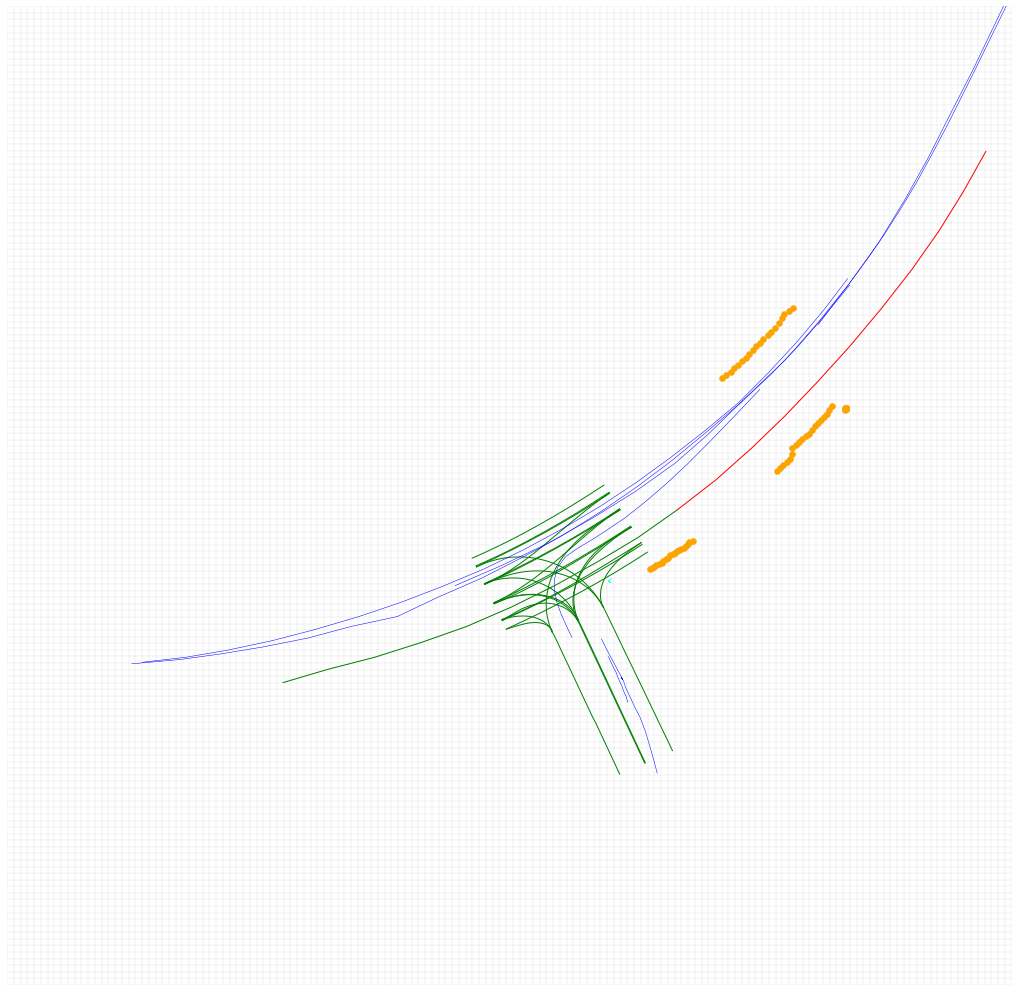

In [36]:
plot_planned_on_grid('8KfB', lane_list=lane_list, \
                           grid_boundary=grid_boundary, veh=sample['veh'][1:], ped=sample['ped'], cyc=sample['cyc'],
                    target_obs=target_obs, planned=target_planned, other_planned=None)

In [ ]:
# animate_planned_on_grid('8KfB', lane_list=lane_list, \
#                             grid_boundary=grid_boundary, veh=sample['veh'][1:], ped=sample['ped'], cyc=sample['cyc'],\
#                       target_obs=target_obs, planned=target_planned)              


## visualize action space 

In [37]:
# task= pickle.load(open("/home/lab1/repo/planning/tasks/task.pickle",'rb'))[0]
task = sample['veh'][0]

In [38]:
def _get_av2( prev2, prev, curr):
    v10 = np.linalg.norm(curr - prev)/0.5
    v9 = np.linalg.norm(prev - prev2)/0.5
    a = (v10-v9)/0.5
    return a, (v10+v9)/2
    
def _get_theta2(prev,curr):
    diff_x = curr[0]-prev[0] 
    diff_y = curr[1]-prev[1]
    indicator=1
    if diff_x<=0 and diff_y>=0:
        indicator=2
    elif diff_x<=0 and diff_y<=0:
        indicator=3
    else:
        indicator=4
    try:
        if diff_x !=0:
            tan = diff_y/diff_x
            # print("tan", tan, math.atan(tan)*180/math.pi)
            return math.atan(tan)*180/math.pi, indicator
        else:
            return 90, indicator
    except:
        return 90, indicator
def _get_guide_prev(traj):
    guide=[]
    for i in range(9,19):
        a,_ = _get_av2(traj[i-1], traj[i], traj[i+1])
        theta, indicator = _get_theta2(traj[i], traj[i+1])
        guide.append([a, theta, indicator])
    return guide
    
def _get_guide(traj):
    ref= list(traj[:10])
    prev_pos = traj[9]
    dsum=0
    for i in range(9,19):
        dsum+= np.linalg.norm(traj[i] - traj[i+1])
    v = dsum/5
#     v =env2.target.v
    # print(dsum, v)

    for i in range(9,19):
        theta, indicator = _get_theta2(traj[i], traj[i+1])
        distance = v*0.5
        radian = theta*math.pi/180
        dx, dy = abs(distance*math.cos(radian)), abs(distance*math.sin(radian))
                #update state
        if indicator==1: # zone 1
            new_pos=[prev_pos[0]+dx, prev_pos[1]+dy]
        elif indicator==2:
            new_pos=[prev_pos[0]-dx, prev_pos[1]+dy]
        elif indicator==3:
            new_pos = [prev_pos[0]-dx, prev_pos[1]-dy]
        else:
            new_pos = [prev_pos[0]+dx, prev_pos[1]-dy]
        ref.append(new_pos)
        prev_pos = new_pos
    ref = np.array(ref)
    guide=[]
    for i in range(9,19):
        a,_ = _get_av2(ref[i-1], ref[i], ref[i+1])
        theta, indicator = _get_theta2(traj[i], traj[i+1])
        guide.append([a, theta, indicator])
    return guide

def max_move(traj, guide):
    # [0.1, -3] [0.1, 3]
    traj_max=[]
    v1 =  np.linalg.norm(traj[10] - traj[9])/0.5
    v2 = np.linalg.norm(traj[9] - traj[8])/0.5
    v = (v1+v2)/2
    pos = traj[9]
    for t in range(10):
        traj_max.append(pos)
        guide_a, guide_theta, guide_indicator  = guide[t]

        a = guide_a+0.1
        theta=guide_theta+3


        distance = v*0.5+0.5*a*0.25
        radian = theta*math.pi/180
        dx, dy = abs(distance*math.cos(radian)), abs(distance*math.sin(radian))
        #update state
        if guide_indicator==1: # zone 1
            pos =[pos[0]+dx, pos[1]+dy]
        elif guide_indicator==2:
            pos =[pos[0]-dx, pos[1]+dy]
        elif guide_indicator==3:
            pos =[pos[0]-dx, pos[1]-dy]
        else:
            pos =[pos[0]+dx, pos[1]-dy]


        v = v+a*0.5
    return np.array(traj_max)

def min_move(traj, guide, unit=-3):
    # [0.1, -3] [0.1, 3]
    traj_min=[]
    v1 =  np.linalg.norm(traj[10] - traj[9])/0.5
    v2 = np.linalg.norm(traj[9] - traj[8])/0.5
    v = (v1+v2)/2
    pos = traj[9]
    for t in range(10):
        traj_min.append(pos)
        guide_a, guide_theta, guide_indicator  = guide[t]

        a = guide_a+0.2
        theta=guide_theta+unit


        distance = v*0.5+0.5*a*0.25
        radian = theta*math.pi/180
        dx, dy = abs(distance*math.cos(radian)), abs(distance*math.sin(radian))
        #update state
        if guide_indicator==1: # zone 1
            pos =[pos[0]+dx, pos[1]+dy]
        elif guide_indicator==2:
            pos =[pos[0]-dx, pos[1]+dy]
        elif guide_indicator==3:
            pos =[pos[0]-dx, pos[1]-dy]
        else:
            pos =[pos[0]+dx, pos[1]-dy]


        v = v+a*0.5
    traj_min.append(pos)
    return np.array(traj_min)

   

In [39]:
guide =_get_guide(task)
print(len(guide))
move1 = max_move(task, guide)
move2 = min_move(task, guide)
# move1.shape
for i in range(10):
    print(move1[i], move2[i])

10
[  550.118 -2377.157] [  550.118 -2377.157]
[  555.52838742 -2381.95214346] [  556.01014782 -2381.36760336]
[  560.57403542 -2387.05509229] [  561.5905679  -2385.93894755]
[  565.42055201 -2392.3813823 ] [  567.01394841 -2390.77103772]
[  570.05796232 -2397.92333157] [  572.2681054  -2395.85875445]
[  574.56995791 -2403.59982782] [  577.42756301 -2401.11279099]
[  578.86514361 -2409.47309621] [  582.40546615 -2406.60681125]
[  582.98381366 -2415.50176908] [  587.23693169 -2412.29580016]
[  586.7984483  -2421.75657442] [  591.79829999 -2418.26659983]
[  590.26595493 -2428.23865456] [  596.04364398 -2424.52658862]


In [41]:
# for unit in np.arange(-5,5, 0.05):
#     move = min_move(task, guide, unit)
#     plt.plot(move[:,0], move[:,1], color='cyan', alpha=0.3)
# plt.plot(task[9:,0], task[9:,1], color='g')
# plt.show()

In [112]:
# plt.plot(move1[:,0], move1[:,1], color='k')
# plt.plot(task[9:,0], task[9:,1], color='g')
# plt.plot(move2[:,0], move2[:,1], color='k')
# plt.show()

In [115]:

def plot_action_with_bound(intersection_id, lane_list, grid_boundary, veh=None, ped=None, cyc=None,\
                        target_obs=None, planned=None, task=None):
    """
    plt action space on the scene
    """
    plt.figure(figsize=(18,18))
    plt.xlim(grid_boundary['8KfB']['X'][0],grid_boundary['8KfB']['X'][1])
    plt.ylim(grid_boundary['8KfB']['Y'][0],grid_boundary['8KfB']['Y'][1])
    for lane in lane_list[intersection_id]:
        plt.plot(Test.map_api.get_lane_coords(lane)['xyz_right'][:,0], Test.map_api.get_lane_coords(lane)['xyz_right'][:,1],
                 color='g',linewidth=1, alpha=0.3, label=lane)
        plt.plot(Test.map_api.get_lane_coords(lane)['xyz_left'][:,0], Test.map_api.get_lane_coords(lane)['xyz_left'][:,1],
                 color='g',alpha =0.3, linewidth=1)
#         print("lane coordinates right", Test.map_api.get_lane_coords(lane)['xyz_right'][:,0])
    x_mesh, y_mesh = get_grid(intersection_id, grid_boundary)
#     print(x_mesh.shape, y_mesh[:,1])
#     plt.plot(x_mesh, y_mesh, c='grey', linewidth=0.1) # use plot, not scatter
#     plt.plot(np.transpose(x_mesh), np.transpose(y_mesh),c='grey', linewidth=0.1) # add this here
#     plt.title(intersection_id,fontsize=30)

    if veh is not None:
        for traj in veh: plt.plot(traj[:,0],traj[:,1], c='b',linewidth=1)
    if ped is not None:
        for traj in ped: plt.scatter(traj[:,0],traj[:,1], c='orange',linewidth=1)
    if cyc is not None:
        for traj in cyc: plt.plot(traj[:,0],traj[:,1], c='cyan',linewidth=1)
    if target_obs is not None:
        plt.plot(target_obs[:,0],target_obs[:,1], c='green',linewidth=1)
    if planned is not None:
        plt.plot(planned[:,0],planned[:,1], c='red',linewidth=1)
        
    guide =_get_guide(task)
    
    for unit in np.arange(-5,6, 0.05):
        move = min_move(task, guide, unit)
        plt.plot(move[:,0], move[:,1], color='gray', alpha=0.1)
#     plt.plot(task[9:,0], task[9:,1], color='k',alpha=0.3 ) # reference line 
    if planned is not None:
        plt.plot(planned[:,0],planned[:,1], c='red',linewidth=1)
        
        
        
    plt.axis('off')
#     plt.savefig("result_fig/action_space")
    plt.show()
    
def plot_action_space(intersection_id, lane_list, grid_boundary, task):
    """
    plt action space with target veh only
    """
    plt.figure(figsize=(18,18))
    plt.xlim(grid_boundary['8KfB']['X'][0],grid_boundary['8KfB']['X'][1])
    plt.ylim(grid_boundary['8KfB']['Y'][0],grid_boundary['8KfB']['Y'][1])
    for lane in lane_list[intersection_id]:
        plt.plot(Test.map_api.get_lane_coords(lane)['xyz_right'][:,0], Test.map_api.get_lane_coords(lane)['xyz_right'][:,1],
                 color='g',linewidth=1,label=lane)
        plt.plot(Test.map_api.get_lane_coords(lane)['xyz_left'][:,0], Test.map_api.get_lane_coords(lane)['xyz_left'][:,1],
                 color='g',linewidth=1)
#         print("lane coordinates right", Test.map_api.get_lane_coords(lane)['xyz_right'][:,0])
    x_mesh, y_mesh = get_grid(intersection_id, grid_boundary)
#     print(x_mesh.shape, y_mesh[:,1])
    plt.plot(x_mesh, y_mesh, c='grey', linewidth=0.1) # use plot, not scatter
    plt.plot(np.transpose(x_mesh), np.transpose(y_mesh),c='grey', linewidth=0.1) # add this here
#     plt.title(intersection_id,fontsize=30)

    guide =_get_guide(task)
    
    for unit in np.arange(-5,6, 0.05):
        move = min_move(task, guide, unit)
        plt.plot(move[:,0], move[:,1], color='cyan', alpha=0.3)
    plt.plot(task[:,0], task[:,1], color='orange')

    plt.axis('off')
#     plt.savefig("result_fig/action_space")
    plt.show()
    

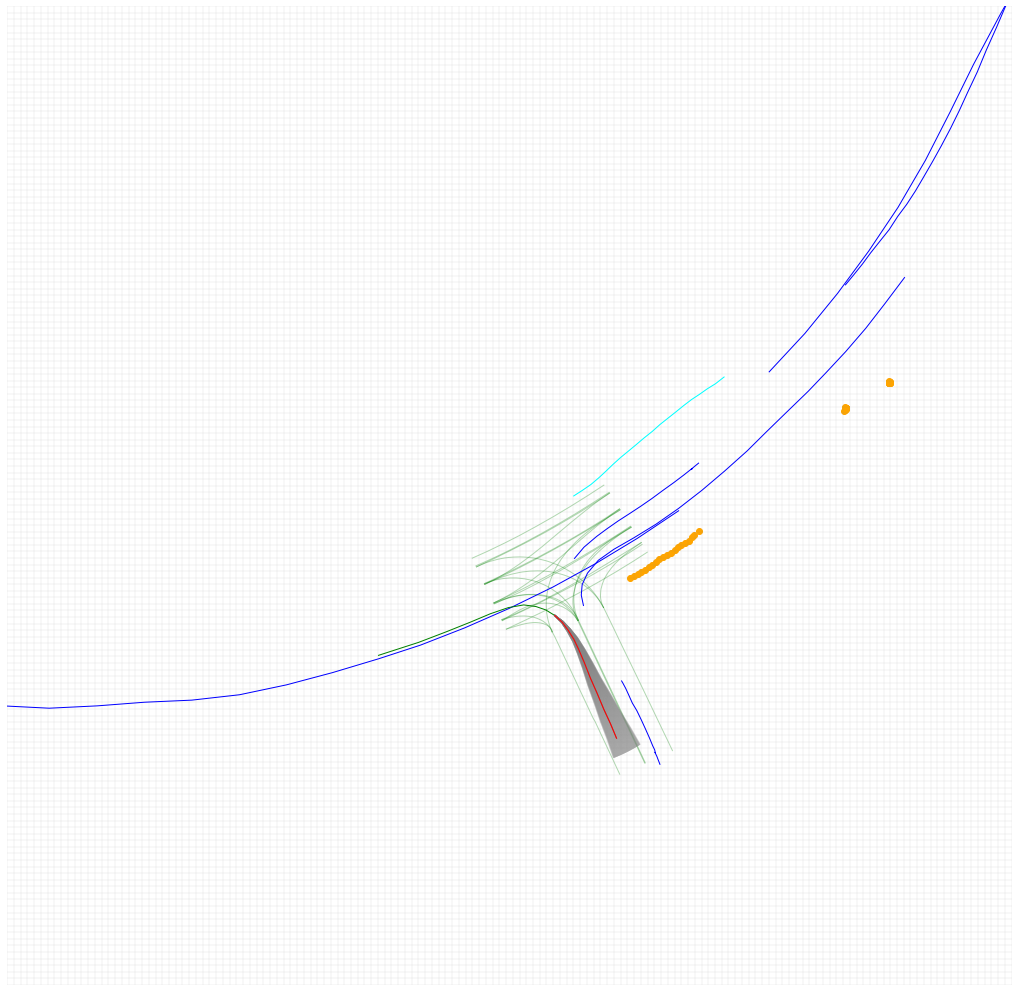

In [116]:
# plot_action_space('8KfB', lane_list=lane_list, grid_boundary=grid_boundary,task=task)
plot_action_with_bound('8KfB', lane_list=lane_list, \
                           grid_boundary=grid_boundary, veh=sample['veh'][1:], ped=sample['ped'], cyc=sample['cyc'],
                    target_obs=target_obs, planned=target_planned, task=task)

In [123]:
# action_dict = list(itertools.product(np.round(np.arange(-0.2,0.21,0.01), decimals=2),\
#                                      np.round(np.arange(-5,6,1), decimals=0))) # delta a, delta theta
# print(len(action_dict), len(np.arange(-0.2,0.21,0.01)), len(np.arange(-5,6,1)))

451 41 11


In [124]:
action_dict = list(itertools.product(np.round(np.arange(-0.2,0.21,0.01), decimals=2), \
                                     np.round(np.arange(-5,6,1), decimals=0)))
print(len(action_dict))

451
